# 图像特效-图像平移

In [1]:
#coding:utf-8
%matplotlib  inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f1.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f2.jpg',0)

In [23]:
def translate(src,x,y,fillcolor=(0,0,0)):
    rows,cols = src.shape[0],src.shape[1]
    if x < -cols:
        x = -cols
    if y < -rows:
        y = -rows
    if x > cols:
        x = cols
    if y > rows:
        y = rows
    dst = np.zeros_like(src)
    dst[:,:,:] = fillcolor
    if x == -cols or x == cols or y == -rows or y == rows:
        return dst
    if x > 0 and y > 0:
        dst[y:rows,x:cols] = src[0:rows-y,0:cols-x]
    if x > 0 and y < 0:
        dst[0:rows-np.abs(y),x:cols] = src[np.abs(y):rows,0:cols-x]
    if x < 0 and y > 0:
        dst[y:rows,0:cols - np.abs(x)] = src[0:rows-y,np.abs(x):cols]
    if x < 0 and y < 0:
        dst[0:rows-np.abs(y),0:cols - np.abs(x)] = src[np.abs(y):rows,np.abs(x):cols]
    return dst

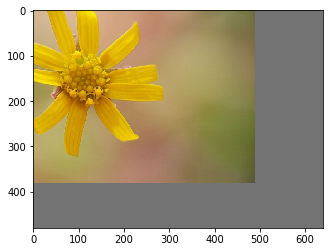

In [26]:
dst = translate(src,-150,-100,fillcolor=(115,115,115))
plt.imshow(dst)